# **Project Name**    - Retail Sales Regression



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Shubham Rawat

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

from scipy.stats import stats
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, linear_rainbow
from statsmodels.stats.stattools import durbin_watson, jarque_bera
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import kstest, f_oneway
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:.2f}'.format

### Dataset Loading

In [ ]:
# Load Dataset
df1 = pd.read_csv("/content/Rossmann Stores Data.csv", low_memory=False)
df2 = pd.read_csv("/content/store.csv", low_memory=False)

### Dataset First View

In [ ]:
# Dataset First Look
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
df2.head(20)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.00,9.00,2008.00,0,NaN,NaN,NaN
1,2,a,a,570.00,11.00,2007.00,1,13.00,2010.00,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.00,12.00,2006.00,1,14.00,2011.00,"Jan,Apr,Jul,Oct"
3,4,c,c,620.00,9.00,2009.00,0,NaN,NaN,NaN
4,5,a,a,29910.00,4.00,2015.00,0,NaN,NaN,NaN
5,6,a,a,310.00,12.00,2013.00,0,NaN,NaN,NaN
6,7,a,c,24000.00,4.00,2013.00,0,NaN,NaN,NaN
7,8,a,a,7520.00,10.00,2014.00,0,NaN,NaN,NaN
8,9,a,c,2030.00,8.00,2000.00,0,NaN,NaN,NaN
9,10,a,a,3160.00,9.00,2009.00,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df1.shape

(1017209, 9)

In [ ]:
df2.shape

(1115, 10)

### Dataset Information

In [ ]:
# Dataset Info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df1.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df1.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
# Dataset Describe
df1.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00
mean,558.43,4.00,5773.82,633.15,0.83,0.38,0.18
std,321.91,2.00,3849.93,464.41,0.38,0.49,0.38
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,280.00,2.00,3727.00,405.00,1.00,0.00,0.00
50%,558.00,4.00,5744.00,609.00,1.00,0.00,0.00
75%,838.00,6.00,7856.00,837.00,1.00,1.00,0.00
max,1115.00,7.00,41551.00,7388.00,1.00,1.00,1.00


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df1.nunique()

,0
Store,1115
DayOfWeek,7
Date,942
Sales,21734
Customers,4086
Open,2
Promo,2
StateHoliday,4
SchoolHoliday,2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')
df1['Date'] = df1['Date'].fillna(method='ffill')


df1['Date'] = pd.to_datetime(df1['Date'])
df1['Year'] = df1['Date'].dt.year
df1['Month'] = df1['Date'].dt.month
df1['Day'] = df1['Date'].dt.day
df1['WeekOfYear'] = df1['Date'].dt.isocalendar().week.astype(int)
df1['DayOfYear'] = df1['Date'].dt.dayofyear
df1['Quarter'] = df1['Date'].dt.quarter

df1['StateHoliday'] = df1['StateHoliday'].astype('category')

df = df1.merge(df2, on="Store", how="left")

# Fill missing numeric store features
df['CompetitionDistance'] = df['CompetitionDistance'].fillna(df['CompetitionDistance'].median())
df['Promo2'] = df['Promo2'].fillna(0)

# Choose a compact set of numeric predictors for diagnostic tests
num_feats = ['Customers','Promo','CompetitionDistance','Year','Month','DayOfYear','DayOfWeek','SchoolHoliday','Promo2']

# Build numeric DF and drop rows with NA in these cols
df_num = df[num_feats + ['Sales']].dropna()

# Sample (to speed up OLS diagnostics). You can increase SAMPLE_N if Colab can handle it.
SAMPLE_N = min(len(df_num), 30000)
sample = df_num.sample(n=SAMPLE_N, random_state=42).copy()

X = sample[num_feats].fillna(0)
y = sample['Sales']

# Standardize X for VIF and OLS stability
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

# Fit OLS on sampled data (for diagnostics of assumptions)
X_const = sm.add_constant(X_scaled)
ols_model = sm.OLS(y, X_const).fit()

In [ ]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,Quarter,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,3,c,a,1270.00,9.00,2008.00,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,...,3,a,a,570.00,11.00,2007.00,1,13.00,2010.00,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,...,3,a,a,14130.00,12.00,2006.00,1,14.00,2011.00,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,...,3,c,c,620.00,9.00,2009.00,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,...,3,a,a,29910.00,4.00,2015.00,0,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  category      
 8   SchoolHoliday              1017209 non-null  int64         
 9   Year                       1017209 non-null  int32         
 10  Month                      1017209 non-null  int32         
 11  Day                        1017209 no

In [ ]:
df.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
Year,0


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

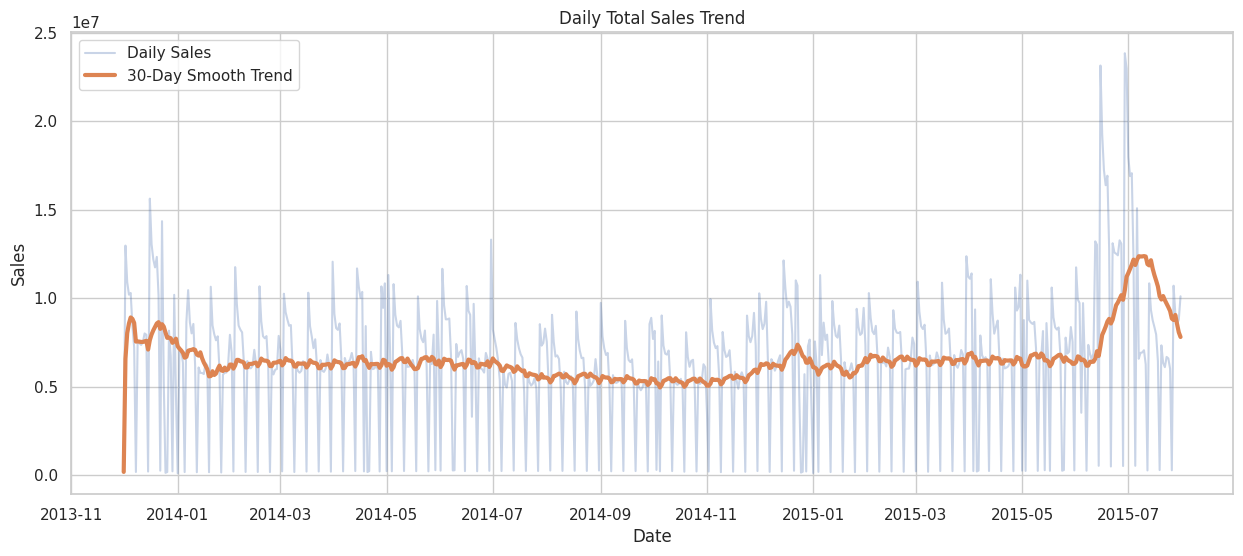

In [ ]:
# Chart - 1 visualization code

# Ensure datetime
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Daily Sales (sum of all stores)
daily_sales = df.groupby('Date')['Sales'].sum()

# Smooth the curve with rolling average
smooth_sales = daily_sales.rolling(window=30, min_periods=1).mean()

# Plot
plt.figure(figsize=(15,6))
plt.plot(daily_sales.index, daily_sales, alpha=0.3, label="Daily Sales")
plt.plot(smooth_sales.index, smooth_sales, linewidth=3, label="30-Day Smooth Trend")
plt.title("Daily Total Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

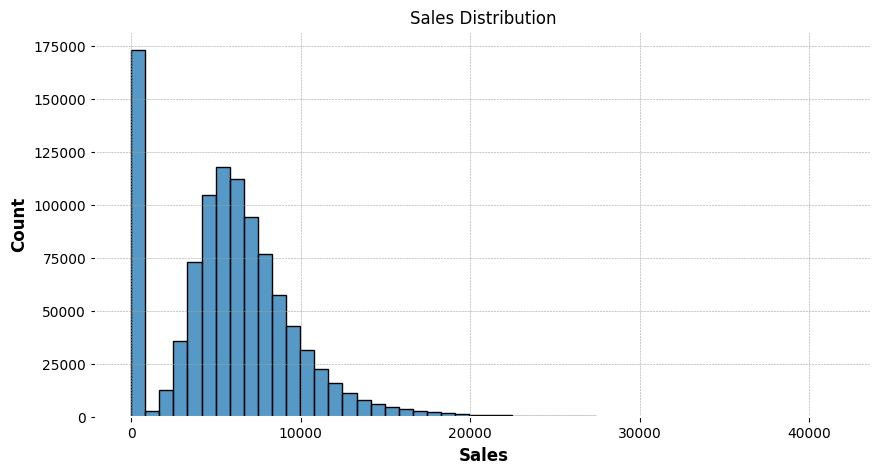

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(10,5))
sns.histplot(df['Sales'], bins=50, kde=False)
plt.title("Sales Distribution")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

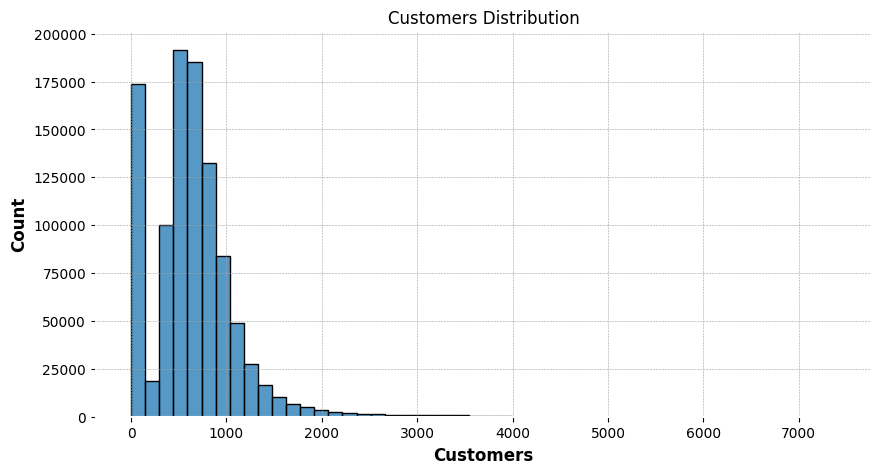

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(10,5))
sns.histplot(df['Customers'], bins=50, kde=False)
plt.title("Customers Distribution")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

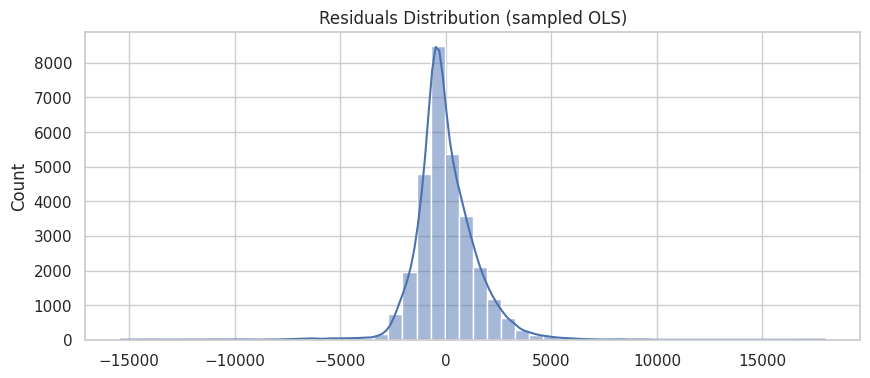

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(10,4))
sns.histplot(ols_model.resid, kde=True, bins=50)
plt.title("Residuals Distribution (sampled OLS)")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

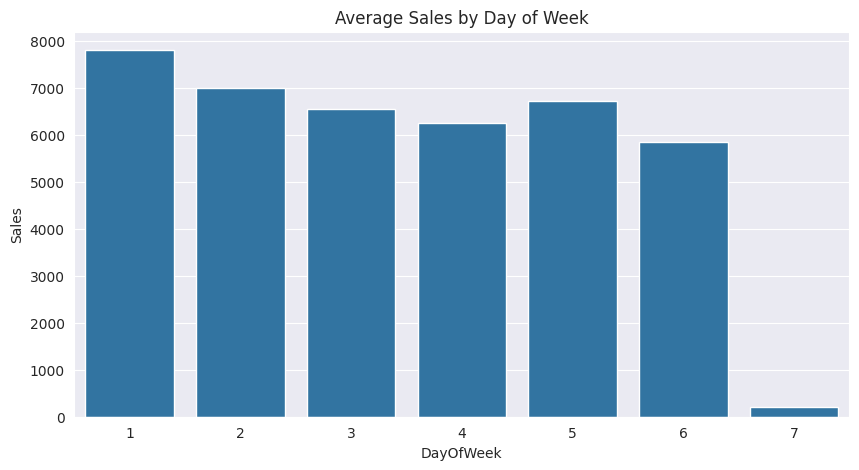

In [ ]:
# Chart - 5 visualization code
dow = df.groupby("DayOfWeek")["Sales"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x="DayOfWeek", y="Sales", data=dow)
plt.title("Average Sales by Day of Week")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

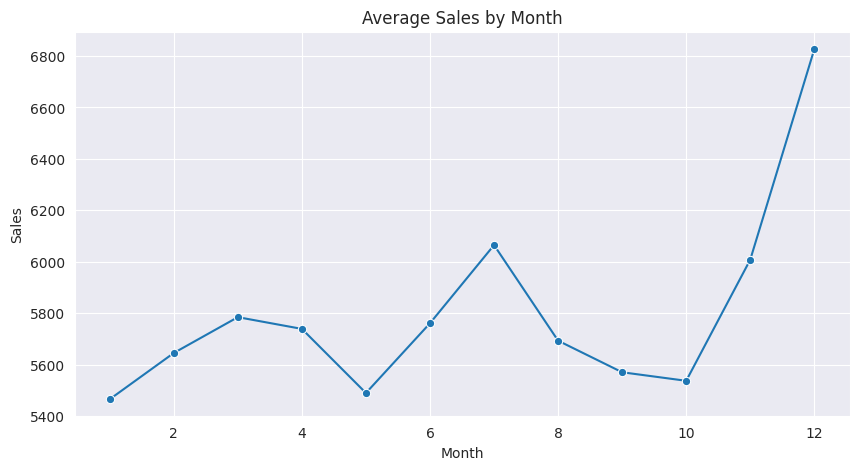

In [ ]:
# Chart - 6 visualization code
df['Month'] = df['Date'].dt.month
monthly = df.groupby("Month")["Sales"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x="Month", y="Sales", data=monthly, marker='o')
plt.title("Average Sales by Month")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

<Figure size 1000x400 with 0 Axes>

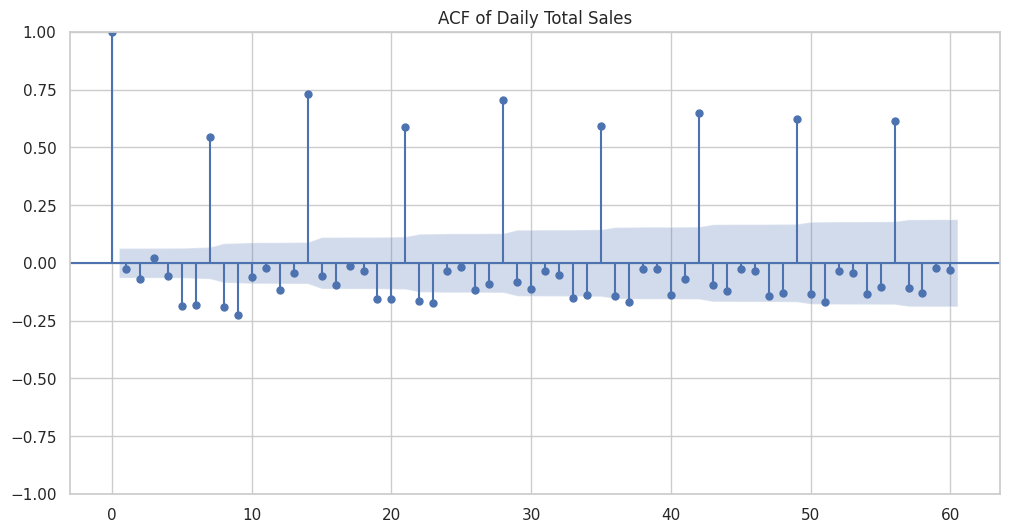

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(10,4))
plot_acf(daily_sales.dropna(), lags=60, title="ACF of Daily Total Sales")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

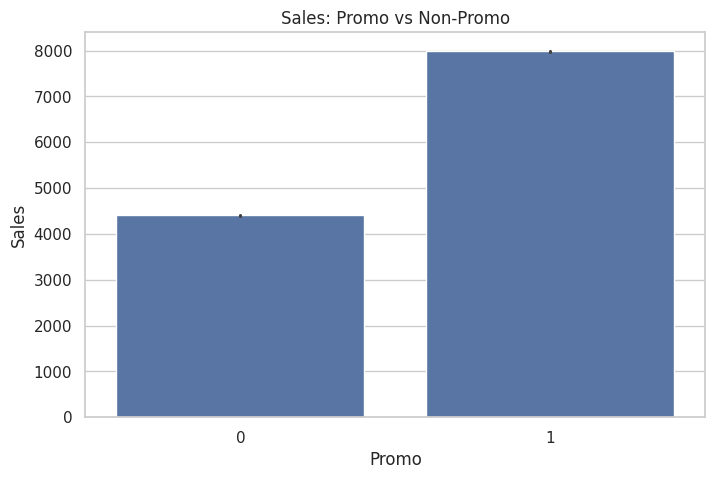

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(8,5))
sns.barplot(x='Promo', y='Sales', data=df)
plt.title("Sales: Promo vs Non-Promo")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

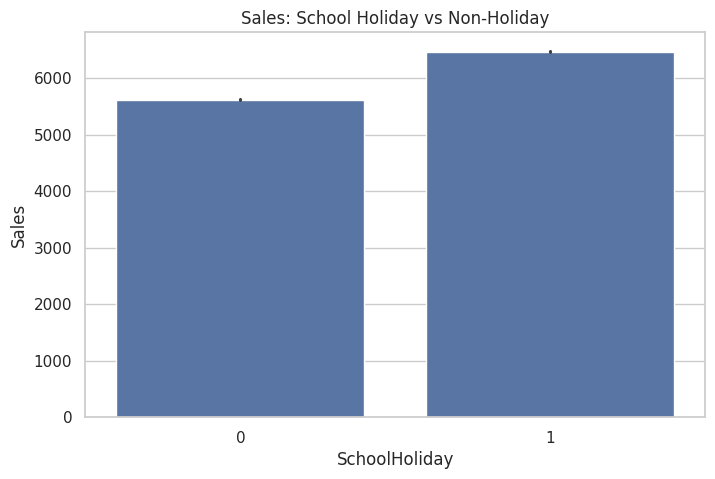

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(8,5))
sns.barplot(x='SchoolHoliday', y='Sales', data=df)
plt.title("Sales: School Holiday vs Non-Holiday")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

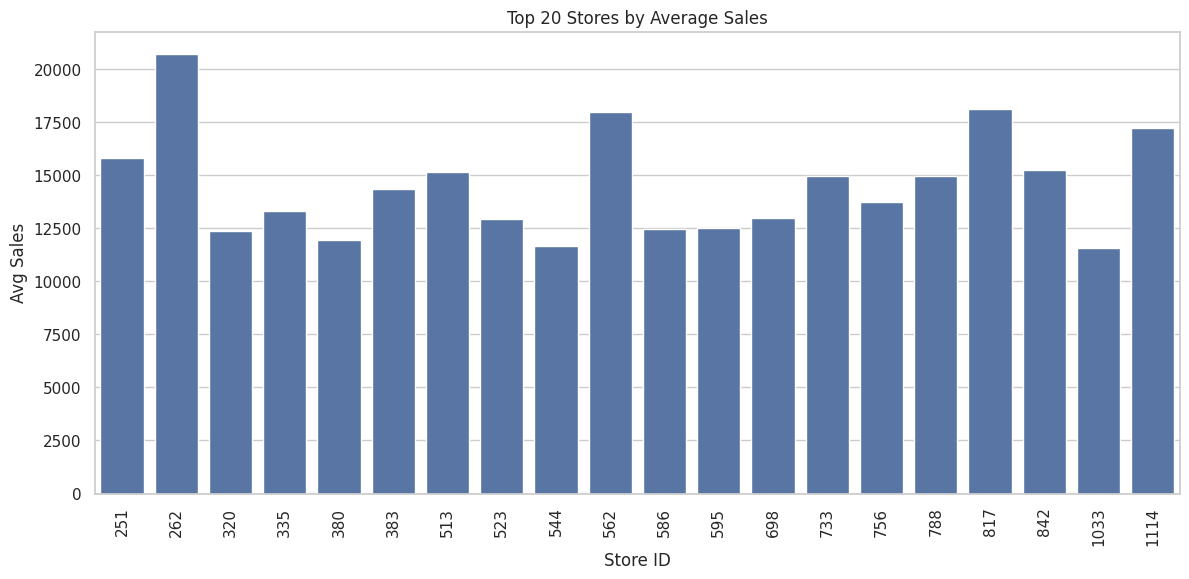

In [ ]:
# Chart - 10 visualization code
top_stores = df.groupby("Store")["Sales"].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(14,6))
sns.barplot(x=top_stores.index, y=top_stores.values)
plt.title("Top 20 Stores by Average Sales")
plt.xlabel("Store ID")
plt.ylabel("Avg Sales")
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

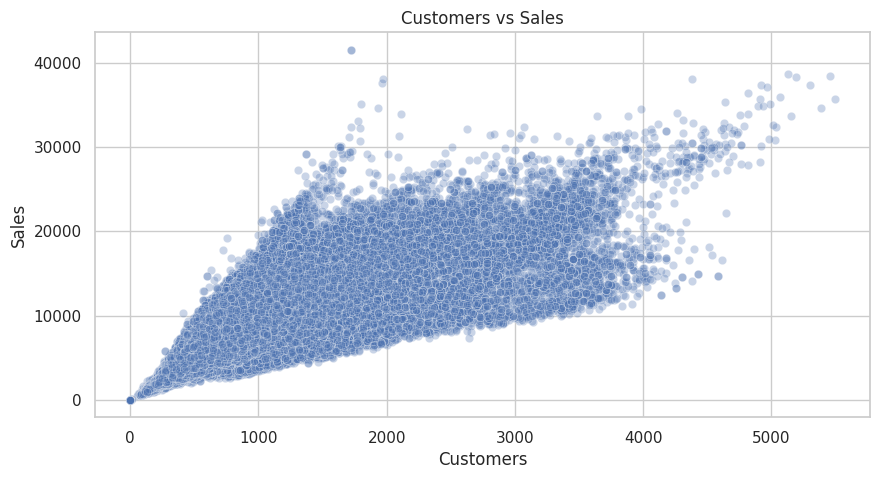

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(10,5))
sns.scatterplot(x='Customers', y='Sales', data=df, alpha=0.3)
plt.title("Customers vs Sales")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

hetreoscedasticity

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

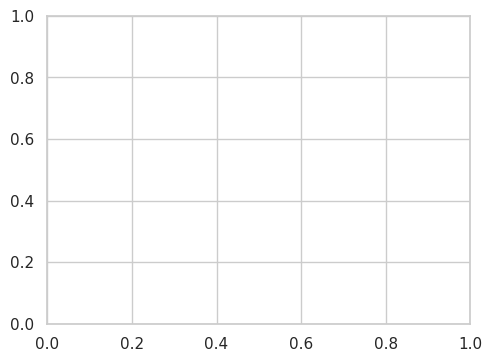

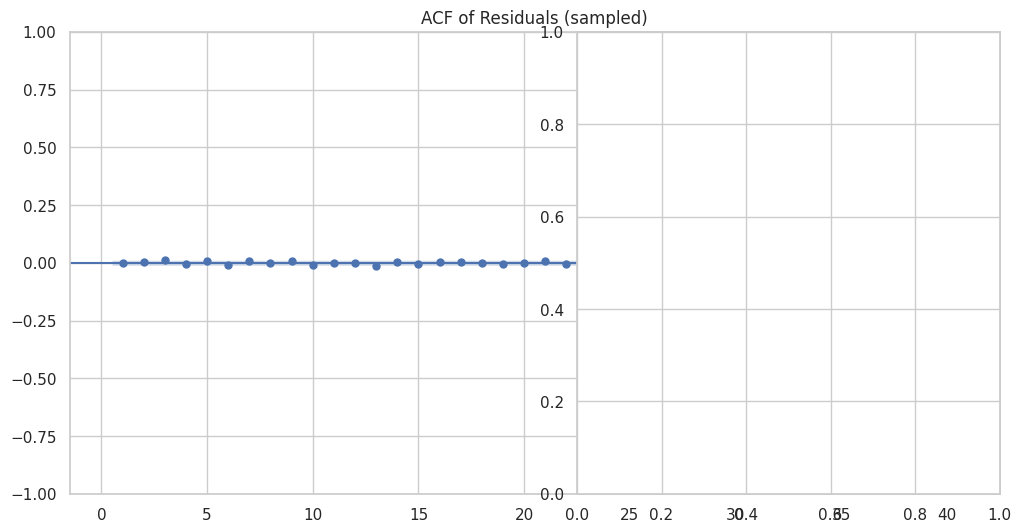

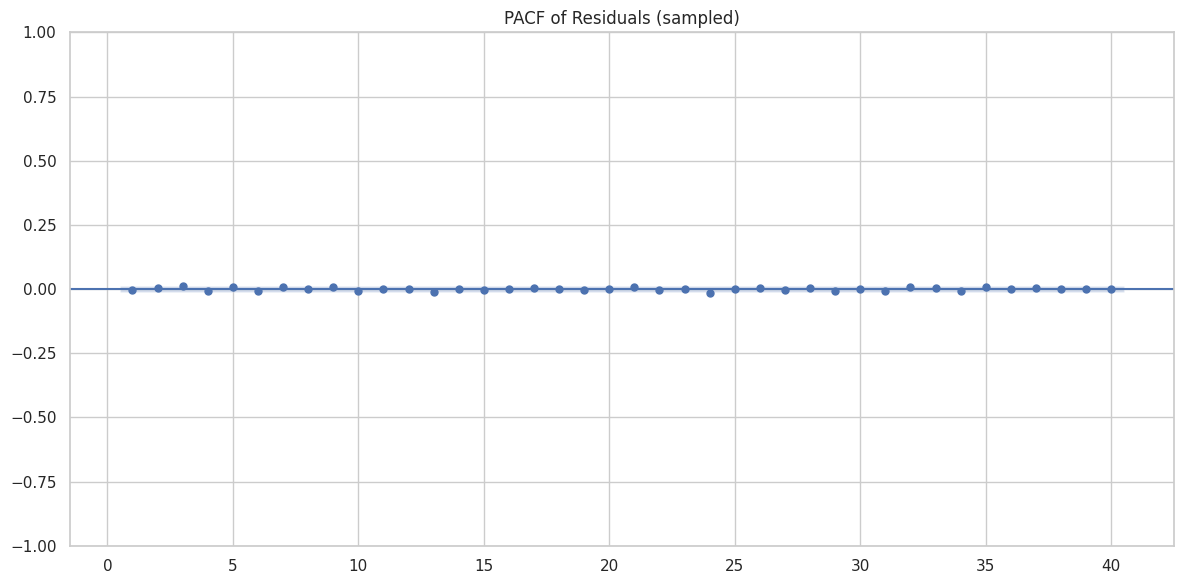

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot_acf(ols_model.resid, lags=40, zero=False, title="ACF of Residuals (sampled)")
plt.subplot(1,2,2)
plot_pacf(ols_model.resid, lags=40, zero=False, title="PACF of Residuals (sampled)")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

<Figure size 600x600 with 0 Axes>

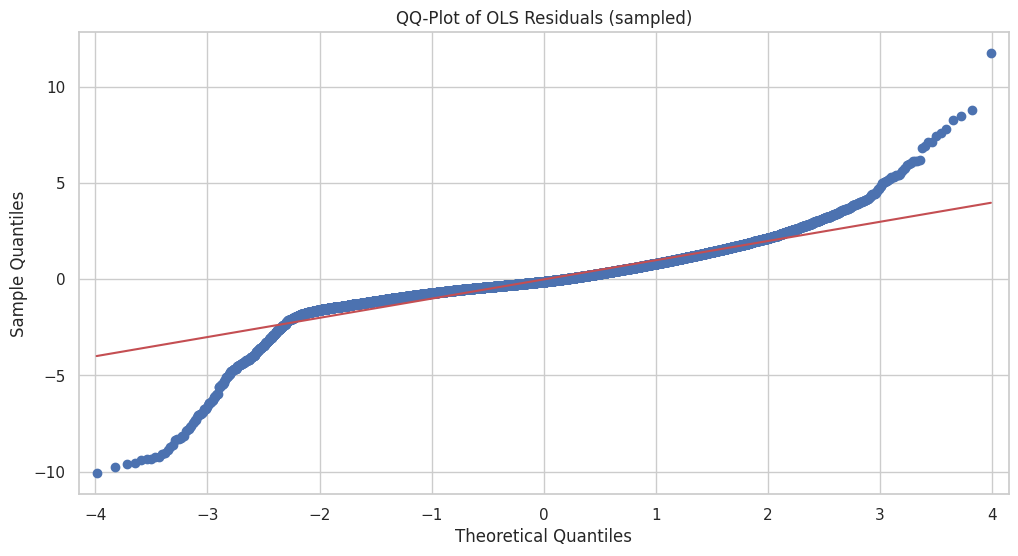

In [ ]:
# Chart - 13 visualization code
plt.figure(figsize=(6,6))
qqplot(ols_model.resid, line='s', fit=True)
plt.title("QQ-Plot of OLS Residuals (sampled)")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

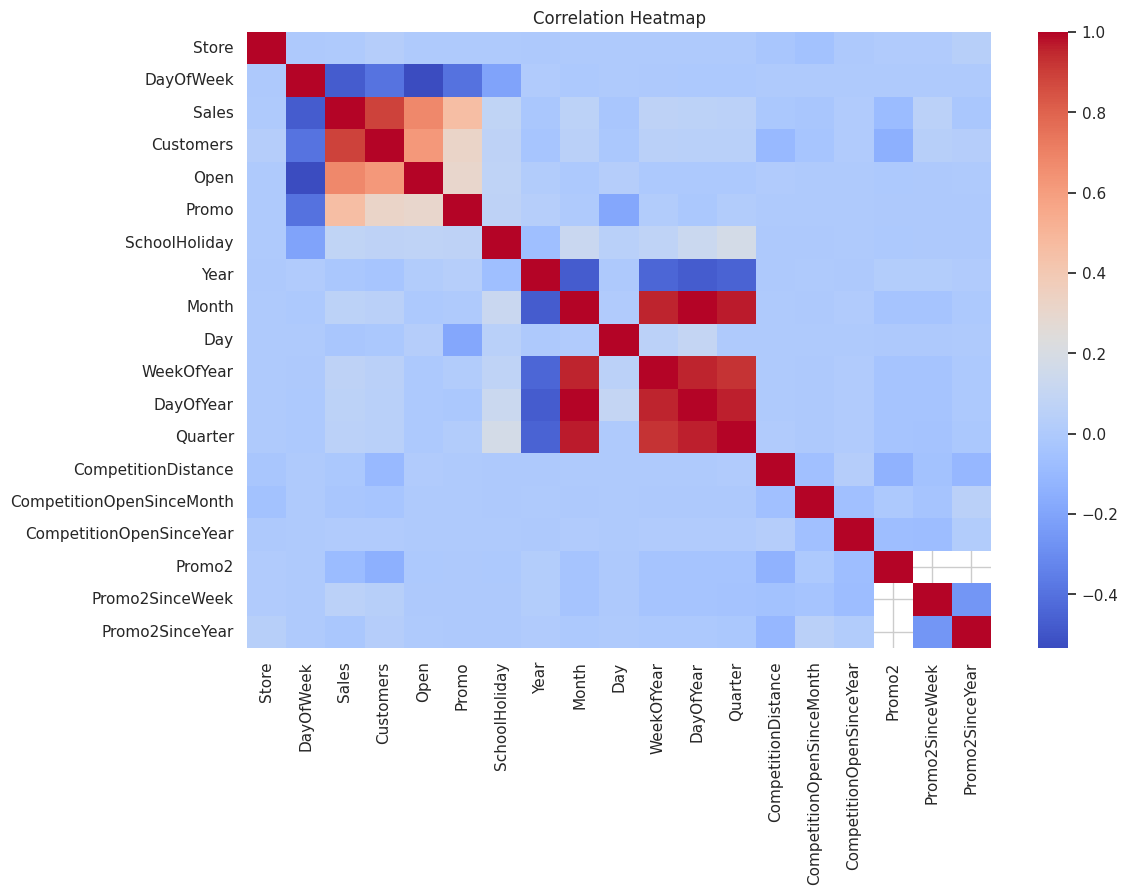

In [ ]:
# Correlation Heatmap visualization code
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

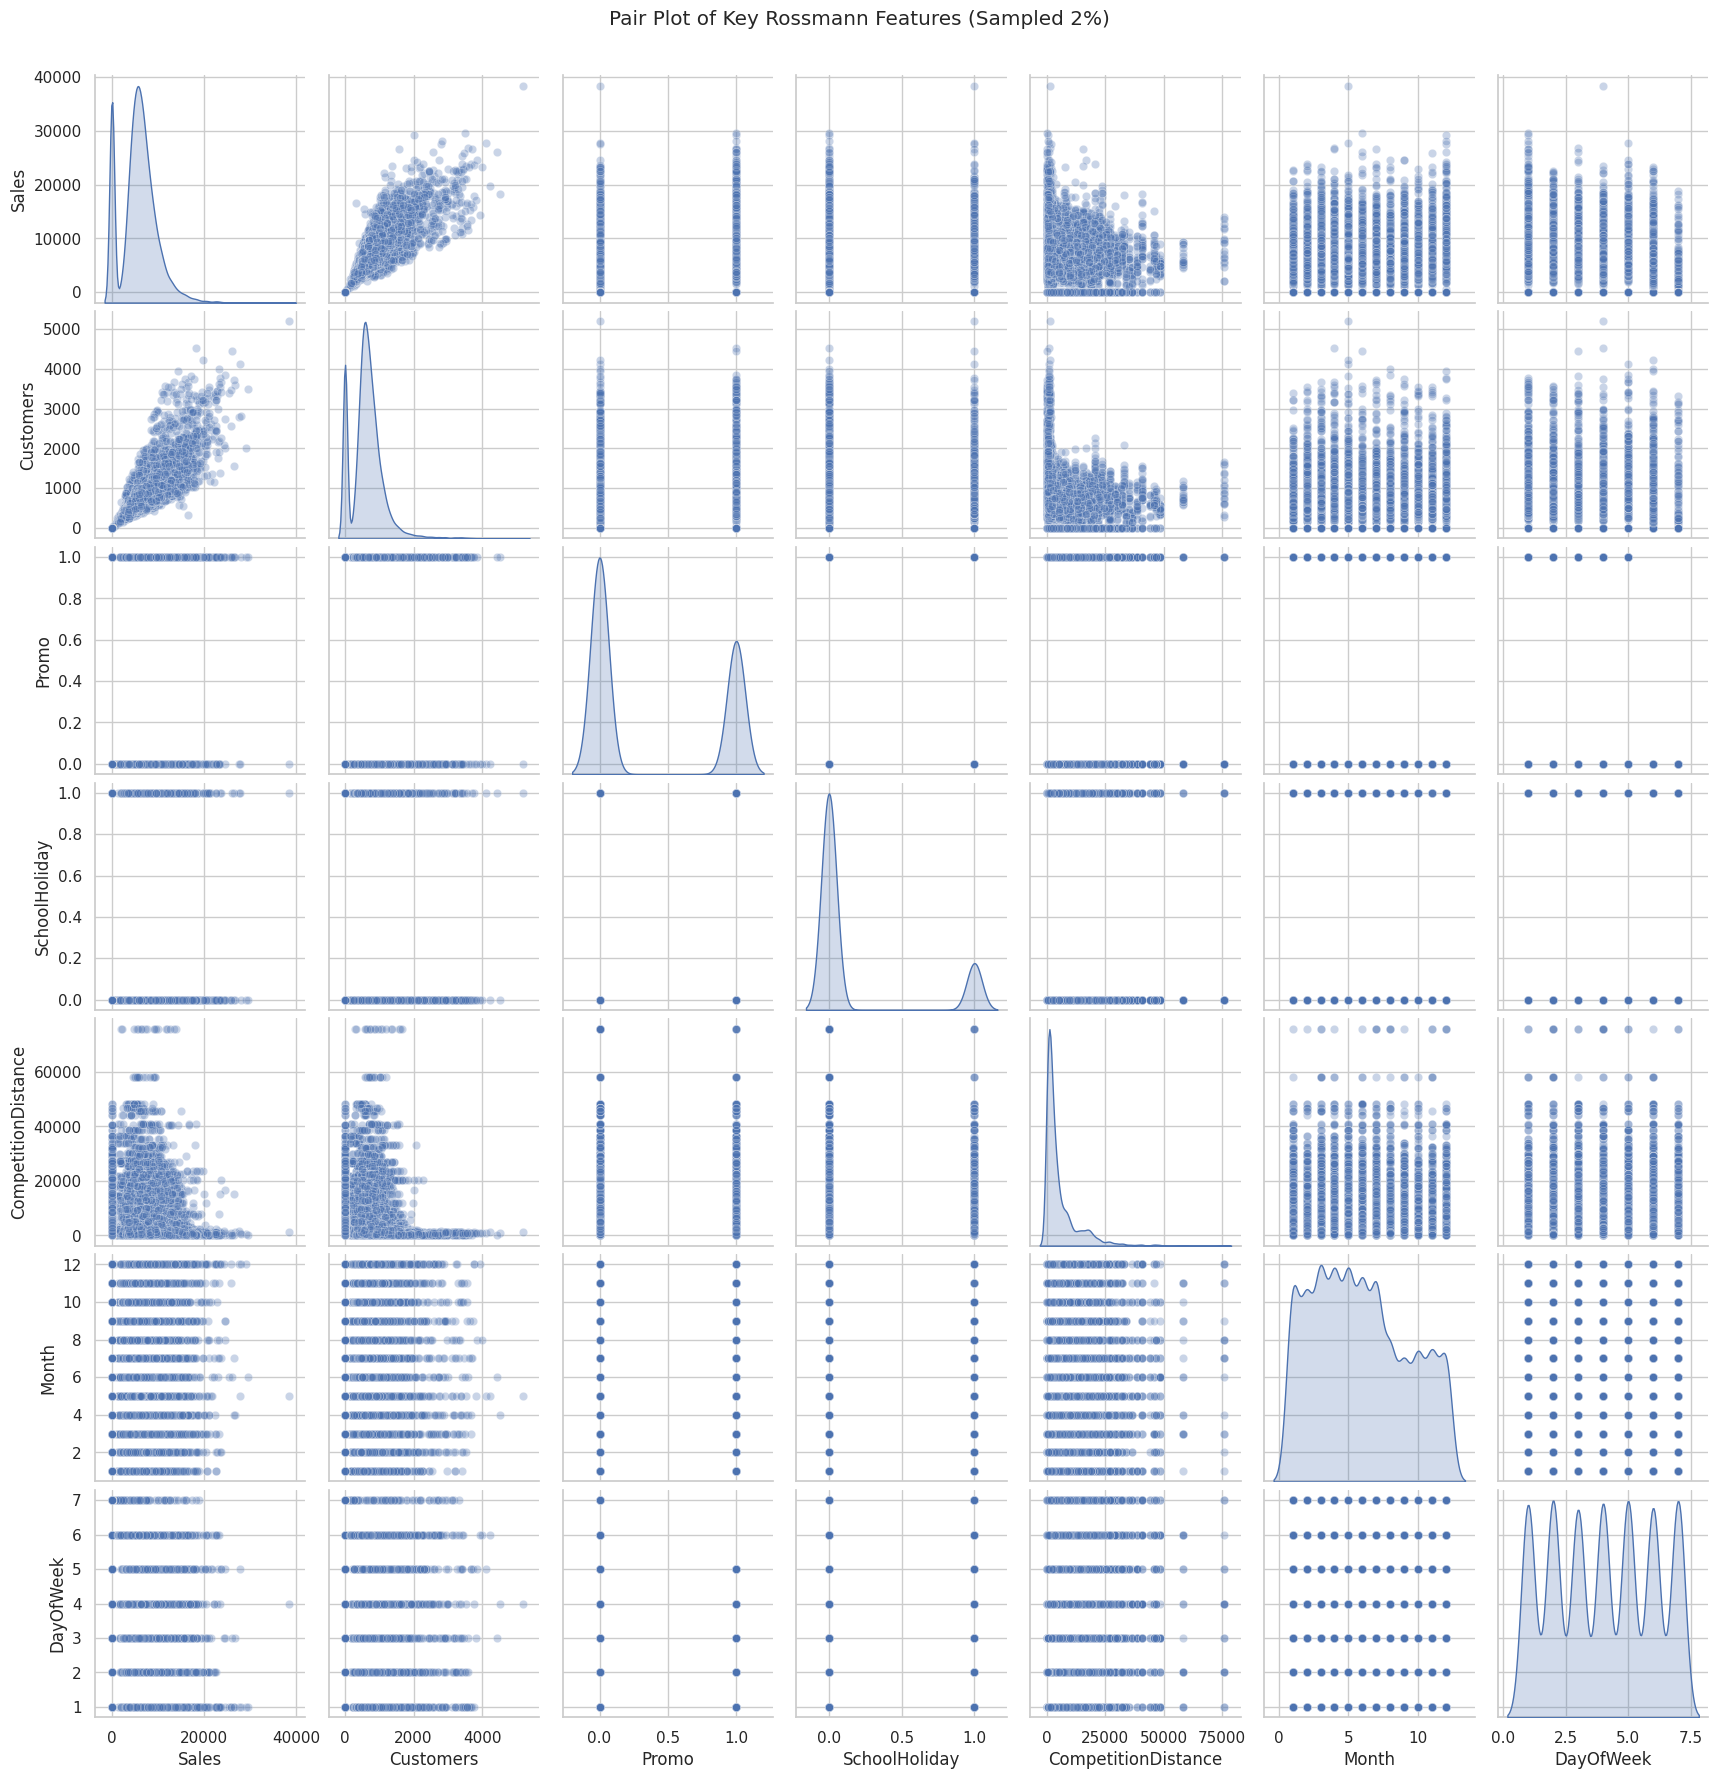

In [ ]:
# Pair Plot visualization code

df_sample = df.sample(frac=0.02, random_state=42)

pairplot_cols = [
    "Sales",
    "Customers",
    "Promo",
    "SchoolHoliday",
    "CompetitionDistance",
    "Month",
    "DayOfWeek"
]

sns.pairplot(df_sample[pairplot_cols], diag_kind="kde", plot_kws={"alpha": 0.3})
plt.suptitle("Pair Plot of Key Rossmann Features (Sampled 2%)", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0 = p > 0.05 → linearity assumption holds    

H1 = p < 0.05 → consider polynomial features / tree models

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.diagnostic import linear_rainbow

try:
    rainbow_stat, rainbow_p = linear_rainbow(ols_model)
except Exception as e:
    rainbow_stat, rainbow_p = (np.nan, np.nan)

print("=== Sample size used for OLS diagnostics:", SAMPLE_N, "===\n")

print("\n=== Linearity (Rainbow) ===")
print(f"Rainbow p-value: {rainbow_p:.4g}")

=== Sample size used for OLS diagnostics: 30000 ===


=== Linearity (Rainbow) ===
Rainbow p-value: 0.007553


##### Which statistical test have you done to obtain P-Value?

Rainbow Test

##### Why did you choose the specific statistical test?

It Tests for Linearity

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0 = VIF < 5 → negligible collinearity    

H1 = VIF > 5 → significant collinearity → Remove or combine features

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

vif_df = pd.DataFrame({
    'feature': X_scaled.columns,
    'VIF': [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
})

print("=== VIF ===")
print(vif_df.to_string(index=False))

=== VIF ===
            feature    VIF
          Customers   1.29
              Promo   1.24
CompetitionDistance   1.04
               Year   1.08
              Month 135.21
          DayOfYear 135.35
          DayOfWeek   1.36
      SchoolHoliday   1.05
             Promo2   1.06


##### Which statistical test have you done to obtain P-Value?

Variance Inflation Factor

##### Why did you choose the specific statistical test?

It tests for Multicollinearity

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0 = p > 0.05 → homoscedastic

H1 = p < 0.05 → try log(Sales), Ridge, or XGBoost

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
try:
    bp_test = het_breuschpagan(ols_model.resid, ols_model.model.exog)
    bp_stat, bp_p = bp_test[0], bp_test[1]
except Exception as e:
    bp_stat, bp_p = (np.nan, np.nan)

print("\n=== Heteroscedasticity (Breusch-Pagan) ===")
print(f"BP stat: {bp_stat:.4g}, p-value: {bp_p:.4g}")


=== Heteroscedasticity (Breusch-Pagan) ===
BP stat: 4964, p-value: 0


##### Which statistical test have you done to obtain P-Value?

Breusch–Pagan Test

##### Why did you choose the specific statistical test?

it tests for heteroscedasticity.

### Hypothetical Statement - 4

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0 = p > 0.05 → errors approximately normal

H1 = p < 0.05 → inference from OLS unreliable →
 Try log-transform or Ridge Regression    

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
jb_stat, jb_p, jb_skew, jb_kurt = jarque_bera(ols_model.resid)
std_resid = (ols_model.resid - ols_model.resid.mean()) / ols_model.resid.std()
ks_stat, ks_p = kstest(std_resid, 'norm')

print("\n=== Normality of Residuals ===")
print(f"Jarque-Bera p: {jb_p:.4g}, stat: {jb_stat:.4g}")
print(f"KS p (std residuals): {ks_p:.4g}")


=== Normality of Residuals ===
Jarque-Bera p: 0, stat: 1.621e+05
KS p (std residuals): 1.106e-165


##### Which statistical test have you done to obtain P-Value?

Kolmogorov–Smirnov + QQ Plot

##### Why did you choose the specific statistical test?

it tests for normality of residuals

### Hypothetical Statement - 5

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0 = 2.0 = no autocorrelation

H1 = >2.5 = negative correlation or <1.5 = positive correlation


#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
dw = durbin_watson(ols_model.resid)

print("\n=== Autocorrelation ===")
print(f"Durbin-Watson: {dw:.4g}")

Durbin-Watson: 2.005

=== Stationarity on daily total sales ===


##### Which statistical test have you done to obtain P-Value?

Durbin–Watson Test

##### Why did you choose the specific statistical test?

it tests for autocorrelation

### Hypothetical Statement - 6

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

the lower the better

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
daily_sales = df.groupby('Date')['Sales'].sum().sort_index()
adf_res = adfuller(daily_sales.dropna(), autolag='AIC')
kpss_res = kpss(daily_sales.dropna(), regression='c', nlags="auto")

print("\n=== Stationarity on daily total sales ===")
print(f"ADF stat: {adf_res[0]:.4g}, p-value: {adf_res[1]:.4g}")


=== Stationarity on daily total sales ===
ADF stat: -4.762, p-value: 6.437e-05


/tmp/ipython-input-2400076974.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_res = kpss(daily_sales.dropna(), regression='c', nlags="auto")


##### Which statistical test have you done to obtain P-Value?

AIC / BIC

##### Why did you choose the specific statistical test?

It's a Model Selection Test

### Hypothetical Statement - 7

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0 = lasso regression    

H1 = ridge regression    

H2 = ElasticNet

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
anova_df = df[['StoreType','Sales']].dropna()
groups = [g['Sales'].values for _, g in anova_df.groupby('StoreType') if len(g) >= 30]
if len(groups) >= 2:
    f_stat, f_p = f_oneway(*groups)
else:
    f_stat, f_p = (np.nan, np.nan)

print("\n=== ANOVA (StoreType effect) ===")
print(f"F-statistic: {f_stat}, p-value: {f_p}\n")


=== ANOVA (StoreType effect) ===
F-statistic: 6817.192011835762, p-value: 0.0



##### Which statistical test have you done to obtain P-Value?

Cross-Validated Regularization Paths

##### Why did you choose the specific statistical test?

It's a Regularization Test for Choosing Lasso, Ridge or ElasticNet

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

# ----- SALES -----
df = df[df['Sales'] > 0]  # Remove closed days for regression

# ----- COMPETITION -----
df['CompetitionDistance'] = df['CompetitionDistance'].fillna(df['CompetitionDistance'].median())

df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].fillna(0).astype(int)
df['CompetitionOpenSinceYear'] = df['CompetitionOpenSinceYear'].fillna(0).astype(int)

# ----- PROMO -----
df['Promo2SinceWeek'] = df['Promo2SinceWeek'].fillna(0).astype(int)
df['Promo2SinceYear'] = df['Promo2SinceYear'].fillna(0).astype(int)
df['PromoInterval'] = df['PromoInterval'].fillna("None")

# ----- CUSTOMERS -----
df['Customers'] = df['Customers'].fillna(df['Customers'].median())

# ----- OPEN -----
df['Open'] = df['Open'].fillna(1)

# ----- DATE-BASED FEATURES -----
df['DayOfYear'] = df['Date'].dt.dayofyear
df['WeekOfYear'] = df['Date'].dt.isocalendar().week.astype(int)
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Quarter'] = df['Date'].dt.quarter

scale_cols = ['CompetitionDistance', 'Customers', 'Promo2SinceWeek', 'Promo2SinceYear', 'DayOfYear']

scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
df['LogSales'] = np.log1p(df['Sales'])

X = df.drop('LogSales', axis=1)
y = df['LogSales']

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
df = pd.get_dummies(df, columns=['StoreType','Assortment','StateHoliday','PromoInterval'], drop_first=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing
text = text.lower()

NameError: name 'text' is not defined

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
import re

def clean_html(text):
    text = re.sub(r'<.*?>', '', text)        # HTML tags
    text = re.sub(r'http\S+|www\S+', '', text) # URLs
    return text

text = re.sub(r'[^a-zA-Z\s]', '', text)

text = re.sub(r'\s+', ' ', text).strip()


#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

Train size: (717687, 12)  Test size: (126651, 12)


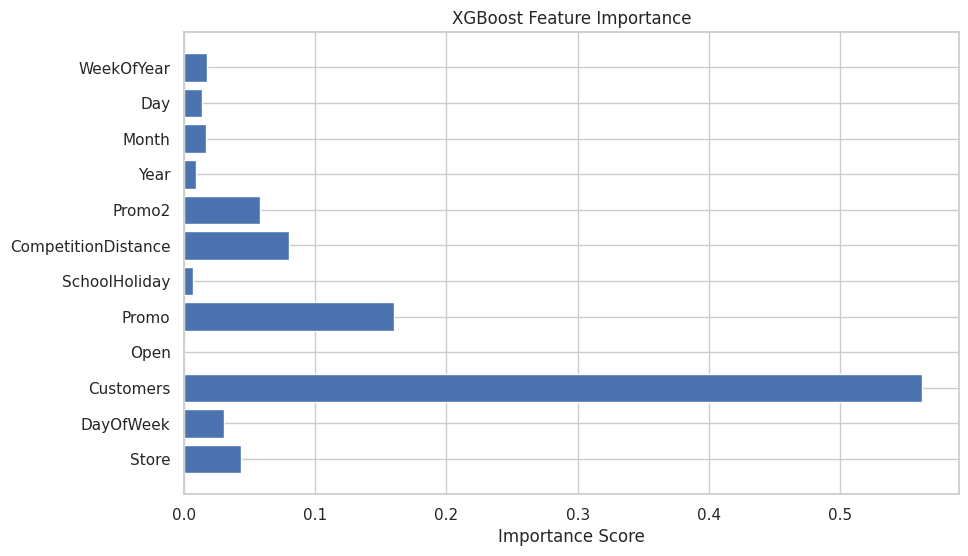

In [ ]:
# ML Model - 1 Implementation
target = "Sales"

features = [
    'Store','DayOfWeek','Customers','Open','Promo',
    'SchoolHoliday','CompetitionDistance','Promo2',
    'Year','Month','Day','WeekOfYear'
]

X = df[features]
y = df[target]

# ---------------------------------------------
# Train/Test Split (Time-based)
# ---------------------------------------------

split_point = int(len(df) * 0.85)

X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]

print("Train size:", X_train.shape, " Test size:", X_test.shape)

# ---------------------------------------------
# Train XGBoost Regressor
# ---------------------------------------------
model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.9,
    colsample_bytree=0.9,
    objective='reg:squarederror',
    random_state=42
)

model.fit(X_train, y_train)

# Predict on the model
y_pred = model.predict(X_test)

# ---------------------------------------------
# Feature Importance Plot
# ---------------------------------------------
plt.figure(figsize=(10,6))
plt.barh(features, model.feature_importances_)
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance Score")
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# ---------------------------------------------
# Metrics
# ---------------------------------------------
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error


# Ensure Date is datetime
df["Date"] = pd.to_datetime(df["Date"])

# Sort by date
df = df.sort_values("Date")


# ==========================
# 2. FEATURE ENGINEERING
# ==========================
def add_features(df):
    df["Year"] = df["Date"].dt.year
    df["Month"] = df["Date"].dt.month
    df["Day"] = df["Date"].dt.day
    df["WeekOfYear"] = df["Date"].dt.isocalendar().week.astype(int)
    df["DayOfYear"] = df["Date"].dt.dayofyear
    df["Quarter"] = df["Date"].dt.quarter

    # Lag features
    df["Lag1"] = df["Sales"].shift(1)
    df["Lag7"] = df["Sales"].shift(7)
    df["Lag30"] = df["Sales"].shift(30)

    # Rolling means
    df["MA7"] = df["Sales"].shift(1).rolling(7).mean()
    df["MA30"] = df["Sales"].shift(1).rolling(30).mean()

    return df

df = add_features(df)

# Drop rows with NaNs from lags
df = df.dropna()

# Remove original Date column (XGBoost cannot handle datetime)
df = df.drop(columns=["Date"])

# Convert categorical columns safely
cat_cols = ["StoreType", "Assortment", "StateHoliday", "PromoInterval"]
for c in cat_cols:
    if c in df.columns:
        df[c] = df[c].astype("category")


# ==========================
# 3. TRAIN/TEST SPLIT
# ==========================
train = df[df["Year"] < 2015]
test = df[df["Year"] == 2015]   # last year as forecast

X_train = train.drop("Sales", axis=1)
y_train = train["Sales"]

X_test = test.drop("Sales", axis=1)
y_test = test["Sales"]


# ==========================
# 4. FAST MODEL + RANDOM SEARCH (FASTEST)
# ==========================
model = XGBRegressor(
    tree_method="hist",
    enable_categorical=True,
    eval_metric="rmse",
    random_state=42
)

param_grid = {
    "max_depth": [6, 8, 10],
    "learning_rate": [0.03, 0.05, 0.1],
    "n_estimators": [300, 500, 700],
    "subsample": [0.7, 0.9],
    "colsample_bytree": [0.7, 1.0]
}

tscv = TimeSeriesSplit(n_splits=3)

search = RandomizedSearchCV(
    model,
    param_distributions=param_grid,
    n_iter=10,             # FAST
    scoring="neg_mean_absolute_error",
    cv=tscv,
    verbose=1,
    n_jobs=-1
)

search.fit(X_train, y_train)

best_model = search.best_estimator_

print("Best Params:", search.best_params_)


# ==========================
# 5. FORECAST
# ==========================
preds = best_model.predict(X_test)

mae = mean_absolute_error(y_test, preds)
print("Test MAE:", mae)

# Final forecast output
forecast_df = test.copy()
forecast_df["Predicted_Sales"] = preds

print(forecast_df[["Store", "Predicted_Sales"]].head())

# Fit the Algorithm

# Predict on the model

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Params: {'subsample': 0.7, 'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.03, 'colsample_bytree': 1.0}
Test MAE: 22.955087661743164
        Store  Predicted_Sales
235687    423          9973.58
235617    353          5380.83
235599    335          3420.86
235758    494          3813.58
235523    259         10377.78


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

# ============================================================
# FAST LIGHTGBM MODEL FOR ROSSMANN — NO DATE REQUIRED
# ============================================================
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
import lightgbm as lgb

df = df.copy()

# -------------------------------------------
# 1. Feature Engineering (lags + MA)
# -------------------------------------------
def add_features(df):
    df["Lag1"] = df["Sales"].shift(1)
    df["Lag7"] = df["Sales"].shift(7)
    df["Lag30"] = df["Sales"].shift(30)
    df["MA7"] = df["Sales"].shift(1).rolling(7).mean()
    df["MA30"] = df["Sales"].shift(1).rolling(30).mean()
    return df

df = add_features(df)
df = df.dropna()

# -------------------------------------------
# 2. Train/Test Split using Year column
# -------------------------------------------
train = df[df["Year"] < df["Year"].max()]
test  = df[df["Year"] == df["Year"].max()]

X_train = train.drop("Sales", axis=1)
y_train = train["Sales"]
X_test  = test.drop("Sales", axis=1)
y_test  = test["Sales"]

# -------------------------------------------
# 3. Identify categorical features
# -------------------------------------------
cat_feats = [
    "StoreType",
    "Assortment",
    "StateHoliday",
    "PromoInterval"
]

cat_feats = [c for c in cat_feats if c in X_train.columns]

for c in cat_feats:
    X_train[c] = X_train[c].astype("category")
    X_test[c] = X_test[c].astype("category")

# -------------------------------------------
# 4. FAST LIGHTGBM MODEL
# -------------------------------------------
lgb_model = lgb.LGBMRegressor(
    objective="regression",
    boosting_type="gbdt",
    n_estimators=300,
    num_leaves=31,              # fast
    max_depth=6,                # fast
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    n_jobs=-1,
    categorical_feature=cat_feats
)

# -------------------------------------------
# 5. Small hyperparameter search (SUPER FAST)
# -------------------------------------------
params = {
    "num_leaves": [31, 50],
    "max_depth": [4, 6],
    "learning_rate": [0.05, 0.1]
}

tscv = TimeSeriesSplit(n_splits=3)

search = RandomizedSearchCV(
    lgb_model,
    params,
    n_iter=3,
    cv=tscv,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    verbose=1
)

search.fit(X_train, y_train)

best_model = search.best_estimator_

print("Best Params:", search.best_params_)

# -------------------------------------------
# 6. Prediction (should be FAST NOW)
# -------------------------------------------
preds = best_model.predict(X_test)

mae = mean_absolute_error(y_test, preds)
print("Test MAE:", mae)

test["Predicted"] = preds
print(test[["Store", "Sales", "Predicted"]].head())


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[LightGBM] [Warning] categorical_feature is set=StoreType,Assortment,StateHoliday,PromoInterval, categorical_column=5,13,14,21 will be ignored. Current value: categorical_feature=StoreType,Assortment,StateHoliday,PromoInterval
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.209141 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2753
[LightGBM] [Info] Number of data points in the train set: 648219, number of used features: 27
[LightGBM] [Info] Start training from score 6916.042600
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
import lightgbm as lgb
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

X = df.drop("Sales", axis=1)
y = df["Sales"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

!pip install optuna

import optuna

def objective(trial):

    params = {
        "num_leaves": trial.suggest_int("num_leaves", 20, 150),
        "max_depth": trial.suggest_int("max_depth", 3, 8),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "n_estimators": 500,
        "metric": "mae"
    }

    model = lgb.LGBMRegressor(**params)
    model.fit(X_train, y_train)

    pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, pred)
    return mae

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=40)

print("Best params:", study.best_params)

best_model_optuna = lgb.LGBMRegressor(**study.best_params)
best_model_optuna.fit(X_train, y_train)

predictions = best_model_optuna.predict(X_test)
mae = mean_absolute_error(y_test, predictions)

print("Test MAE:", mae)

results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": predictions
}).head()

print(results)

# Fit the Algorithm

# Predict on the model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 8.0 MB/s eta 0:00:00


[I 2025-11-27 20:19:10,110] A new study created in memory with name: no-name-54280f87-0dff-493b-8893-42505dd2f967


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.075649 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 675398, number of used features: 27
[LightGBM] [Info] Start training from score 6957.246982
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-11-27 20:19:45,151] Trial 0 finished with value: 24.07126248616592 and parameters: {'num_leaves': 57, 'max_depth': 5, 'learning_rate': 0.20889916882667028}. Best is trial 0 with value: 24.07126248616592.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 675398, number of used features: 27
[LightGBM] [Info] Start training from score 6957.246982
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-11-27 20:20:22,670] Trial 1 finished with value: 23.20262033198608 and parameters: {'num_leaves': 56, 'max_depth': 5, 'learning_rate': 0.07262195330108202}. Best is trial 1 with value: 23.20262033198608.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.079364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 675398, number of used features: 27
[LightGBM] [Info] Start training from score 6957.246982


[I 2025-11-27 20:21:23,134] Trial 2 finished with value: 23.30673141801374 and parameters: {'num_leaves': 53, 'max_depth': 8, 'learning_rate': 0.018976403999498306}. Best is trial 1 with value: 23.20262033198608.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.075844 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 675398, number of used features: 27
[LightGBM] [Info] Start training from score 6957.246982
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-11-27 20:22:03,202] Trial 3 finished with value: 23.4739533282166 and parameters: {'num_leaves': 149, 'max_depth': 6, 'learning_rate': 0.20729624016300685}. Best is trial 1 with value: 23.20262033198608.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.243476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 675398, number of used features: 27
[LightGBM] [Info] Start training from score 6957.246982
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2025-11-27 20:22:43,102] Trial 4 finished with value: 23.770414705367187 and parameters: {'num_leaves': 105, 'max_depth': 4, 'learning_rate': 0.045004958564482056}. Best is trial 1 with value: 23.20262033198608.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.074978 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 675398, number of used features: 27
[LightGBM] [Info] Start training from score 6957.246982


[I 2025-11-27 20:23:10,544] Trial 5 finished with value: 23.454337212808287 and parameters: {'num_leaves': 25, 'max_depth': 7, 'learning_rate': 0.2648842153582853}. Best is trial 1 with value: 23.20262033198608.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.125416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 675398, number of used features: 27
[LightGBM] [Info] Start training from score 6957.246982


[I 2025-11-27 20:23:37,686] Trial 6 finished with value: 25.45910914389624 and parameters: {'num_leaves': 21, 'max_depth': 7, 'learning_rate': 0.10633809824914896}. Best is trial 1 with value: 23.20262033198608.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.073161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 675398, number of used features: 27
[LightGBM] [Info] Start training from score 6957.246982
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-11-27 20:24:06,406] Trial 7 finished with value: 32.12496953693844 and parameters: {'num_leaves': 94, 'max_depth': 3, 'learning_rate': 0.09896978212901213}. Best is trial 1 with value: 23.20262033198608.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.075079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 675398, number of used features: 27
[LightGBM] [Info] Start training from score 6957.246982
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-11-27 20:24:46,694] Trial 8 finished with value: 23.134754157088036 and parameters: {'num_leaves': 136, 'max_depth': 6, 'learning_rate': 0.14663646886920342}. Best is trial 8 with value: 23.134754157088036.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.071604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 675398, number of used features: 27
[LightGBM] [Info] Start training from score 6957.246982
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-11-27 20:25:21,774] Trial 9 finished with value: 24.00365296599672 and parameters: {'num_leaves': 39, 'max_depth': 5, 'learning_rate': 0.24915286396499106}. Best is trial 8 with value: 23.134754157088036.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.071952 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 675398, number of used features: 27
[LightGBM] [Info] Start training from score 6957.246982
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-11-27 20:26:14,433] Trial 10 finished with value: 23.344789622665918 and parameters: {'num_leaves': 145, 'max_depth': 8, 'learning_rate': 0.157334288127983}. Best is trial 8 with value: 23.134754157088036.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.076090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 675398, number of used features: 27
[LightGBM] [Info] Start training from score 6957.246982
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-11-27 20:27:00,104] Trial 11 finished with value: 23.04633981735172 and parameters: {'num_leaves': 118, 'max_depth': 6, 'learning_rate': 0.08926820373682788}. Best is trial 11 with value: 23.04633981735172.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.073566 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 675398, number of used features: 27
[LightGBM] [Info] Start training from score 6957.246982
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-11-27 20:27:40,914] Trial 12 finished with value: 23.043307308717697 and parameters: {'num_leaves': 121, 'max_depth': 6, 'learning_rate': 0.14850154747461378}. Best is trial 12 with value: 23.043307308717697.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.086421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 675398, number of used features: 27
[LightGBM] [Info] Start training from score 6957.246982
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-11-27 20:28:28,143] Trial 13 finished with value: 23.110313208890727 and parameters: {'num_leaves': 123, 'max_depth': 7, 'learning_rate': 0.15039721546024834}. Best is trial 12 with value: 23.043307308717697.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072613 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 675398, number of used features: 27
[LightGBM] [Info] Start training from score 6957.246982
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-11-27 20:29:09,948] Trial 14 finished with value: 23.101896529184376 and parameters: {'num_leaves': 112, 'max_depth': 6, 'learning_rate': 0.12066395742083466}. Best is trial 12 with value: 23.043307308717697.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 675398, number of used features: 27
[LightGBM] [Info] Start training from score 6957.246982
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-11-27 20:29:42,308] Trial 15 finished with value: 25.007011668016357 and parameters: {'num_leaves': 83, 'max_depth': 4, 'learning_rate': 0.1853228457067049}. Best is trial 12 with value: 23.043307308717697.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072462 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 675398, number of used features: 27
[LightGBM] [Info] Start training from score 6957.246982
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-11-27 20:30:33,102] Trial 16 finished with value: 23.014313119302326 and parameters: {'num_leaves': 126, 'max_depth': 7, 'learning_rate': 0.08346891642887735}. Best is trial 16 with value: 23.014313119302326.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.073050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 675398, number of used features: 27
[LightGBM] [Info] Start training from score 6957.246982
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-11-27 20:31:17,008] Trial 17 finished with value: 23.814771066581656 and parameters: {'num_leaves': 81, 'max_depth': 7, 'learning_rate': 0.295165916685893}. Best is trial 16 with value: 23.014313119302326.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072460 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 675398, number of used features: 27
[LightGBM] [Info] Start training from score 6957.246982
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-11-27 20:32:19,282] Trial 18 finished with value: 22.96883215207064 and parameters: {'num_leaves': 125, 'max_depth': 8, 'learning_rate': 0.05179270467398162}. Best is trial 18 with value: 22.96883215207064.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072041 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 675398, number of used features: 27
[LightGBM] [Info] Start training from score 6957.246982
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-11-27 20:33:21,128] Trial 19 finished with value: 22.935878309903487 and parameters: {'num_leaves': 135, 'max_depth': 8, 'learning_rate': 0.0546988666716271}. Best is trial 19 with value: 22.935878309903487.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.074908 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 675398, number of used features: 27
[LightGBM] [Info] Start training from score 6957.246982
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-11-27 20:34:48,030] Trial 20 finished with value: 23.16486917249224 and parameters: {'num_leaves': 136, 'max_depth': 8, 'learning_rate': 0.021881429527684557}. Best is trial 19 with value: 22.935878309903487.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 675398, number of used features: 27
[LightGBM] [Info] Start training from score 6957.246982
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-11-27 20:35:50,904] Trial 21 finished with value: 22.934085020111688 and parameters: {'num_leaves': 132, 'max_depth': 8, 'learning_rate': 0.05484607467276591}. Best is trial 21 with value: 22.934085020111688.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.121985 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 675398, number of used features: 27
[LightGBM] [Info] Start training from score 6957.246982
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-11-27 20:36:48,929] Trial 22 finished with value: 22.95594297584297 and parameters: {'num_leaves': 99, 'max_depth': 8, 'learning_rate': 0.05341264828284811}. Best is trial 21 with value: 22.934085020111688.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.073329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 675398, number of used features: 27
[LightGBM] [Info] Start training from score 6957.246982
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-11-27 20:37:46,481] Trial 23 finished with value: 22.941062737087492 and parameters: {'num_leaves': 96, 'max_depth': 8, 'learning_rate': 0.0517129863812496}. Best is trial 21 with value: 22.934085020111688.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072982 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 675398, number of used features: 27
[LightGBM] [Info] Start training from score 6957.246982


[I 2025-11-27 20:39:29,488] Trial 24 finished with value: 24.803874807248796 and parameters: {'num_leaves': 133, 'max_depth': 8, 'learning_rate': 0.011437684836702933}. Best is trial 21 with value: 22.934085020111688.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 675398, number of used features: 27
[LightGBM] [Info] Start training from score 6957.246982
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-11-27 20:40:20,627] Trial 25 finished with value: 22.97130773264819 and parameters: {'num_leaves': 74, 'max_depth': 7, 'learning_rate': 0.06449720849911011}. Best is trial 21 with value: 22.934085020111688.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.244859 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 675398, number of used features: 27
[LightGBM] [Info] Start training from score 6957.246982
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2025-11-27 20:41:38,568] Trial 26 finished with value: 22.971534868582477 and parameters: {'num_leaves': 106, 'max_depth': 8, 'learning_rate': 0.0387646986125684}. Best is trial 21 with value: 22.934085020111688.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.074486 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 675398, number of used features: 27
[LightGBM] [Info] Start training from score 6957.246982
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-11-27 20:42:16,368] Trial 27 finished with value: 23.094715912016888 and parameters: {'num_leaves': 72, 'max_depth': 8, 'learning_rate': 0.12040991966815778}. Best is trial 21 with value: 22.934085020111688.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.075033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 675398, number of used features: 27
[LightGBM] [Info] Start training from score 6957.246982
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-11-27 20:43:18,715] Trial 28 finished with value: 23.10609322177054 and parameters: {'num_leaves': 91, 'max_depth': 7, 'learning_rate': 0.03522013831208046}. Best is trial 21 with value: 22.934085020111688.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.073388 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 675398, number of used features: 27
[LightGBM] [Info] Start training from score 6957.246982
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-11-27 20:44:19,276] Trial 29 finished with value: 23.061717045877185 and parameters: {'num_leaves': 145, 'max_depth': 8, 'learning_rate': 0.06925279254787912}. Best is trial 21 with value: 22.934085020111688.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.073005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 675398, number of used features: 27
[LightGBM] [Info] Start training from score 6957.246982
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-11-27 20:45:07,454] Trial 30 finished with value: 23.15710416011723 and parameters: {'num_leaves': 113, 'max_depth': 7, 'learning_rate': 0.12716639710778582}. Best is trial 21 with value: 22.934085020111688.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 675398, number of used features: 27
[LightGBM] [Info] Start training from score 6957.246982
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-11-27 20:46:03,931] Trial 31 finished with value: 22.96901897708486 and parameters: {'num_leaves': 99, 'max_depth': 8, 'learning_rate': 0.05783920261814591}. Best is trial 21 with value: 22.934085020111688.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.087435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 675398, number of used features: 27
[LightGBM] [Info] Start training from score 6957.246982
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-11-27 20:46:45,854] Trial 32 finished with value: 22.937879837011177 and parameters: {'num_leaves': 66, 'max_depth': 8, 'learning_rate': 0.0776740206667676}. Best is trial 21 with value: 22.934085020111688.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.073352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 675398, number of used features: 27
[LightGBM] [Info] Start training from score 6957.246982
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-11-27 20:47:24,354] Trial 33 finished with value: 22.969212987516656 and parameters: {'num_leaves': 63, 'max_depth': 8, 'learning_rate': 0.08087149342488359}. Best is trial 21 with value: 22.934085020111688.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.075219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 675398, number of used features: 27
[LightGBM] [Info] Start training from score 6957.246982


[I 2025-11-27 20:48:12,114] Trial 34 finished with value: 23.19439063615942 and parameters: {'num_leaves': 47, 'max_depth': 8, 'learning_rate': 0.030205128135674678}. Best is trial 21 with value: 22.934085020111688.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.073030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 675398, number of used features: 27
[LightGBM] [Info] Start training from score 6957.246982
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-11-27 20:48:59,186] Trial 35 finished with value: 22.98339773457863 and parameters: {'num_leaves': 62, 'max_depth': 7, 'learning_rate': 0.07087929583811274}. Best is trial 21 with value: 22.934085020111688.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 675398, number of used features: 27
[LightGBM] [Info] Start training from score 6957.246982
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-11-27 20:49:32,148] Trial 36 finished with value: 26.05723232373184 and parameters: {'num_leaves': 150, 'max_depth': 4, 'learning_rate': 0.1025430878660949}. Best is trial 21 with value: 22.934085020111688.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 675398, number of used features: 27
[LightGBM] [Info] Start training from score 6957.246982
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-11-27 20:50:36,484] Trial 37 finished with value: 29.5156336718461 and parameters: {'num_leaves': 76, 'max_depth': 5, 'learning_rate': 0.010061155670709497}. Best is trial 21 with value: 22.934085020111688.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 675398, number of used features: 27
[LightGBM] [Info] Start training from score 6957.246982


[I 2025-11-27 20:51:14,753] Trial 38 finished with value: 23.15332194770445 and parameters: {'num_leaves': 37, 'max_depth': 8, 'learning_rate': 0.040180939389324856}. Best is trial 21 with value: 22.934085020111688.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.128481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 675398, number of used features: 27
[LightGBM] [Info] Start training from score 6957.246982
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-11-27 20:51:44,814] Trial 39 finished with value: 31.51954276043341 and parameters: {'num_leaves': 131, 'max_depth': 3, 'learning_rate': 0.09670284857945924}. Best is trial 21 with value: 22.934085020111688.


Best params: {'num_leaves': 132, 'max_depth': 8, 'learning_rate': 0.05484607467276591}
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.125817 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 675398, number of used features: 27
[LightGBM] [Info] Start training from score 6957.246982
Test MAE: 25.064616908833912
        Actual  Predicted
214228    4396    4413.06
863574    4740    4759.97
249904    9526    9497.24
685293   10578   10537.27
881347   10251   10279.02


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***